
## Differential description

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [600]:
data = pd.read_csv("Loan-Prediction-Dataset-master\\train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [601]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null float64
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [602]:
data.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [603]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [604]:
data.Gender = data.Gender.fillna('Male')

In [605]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [606]:
data.Married = data.Married.fillna('Yes')

In [607]:
data['Dependents'].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [608]:
data.Dependents = data.Dependents.fillna('0')

In [609]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [610]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [611]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [612]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [613]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [614]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [615]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [616]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [617]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [618]:
# Splitting traing data
X = data.iloc[:, 1: 12].values
y = data.iloc[:, 12].values

In [619]:
X[1:10]

array([['Male', 'Yes', 1.0, 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0,
        1.0, 'Rural'],
       ['Male', 'Yes', 0.0, 'Graduate', 'Yes', 3000, 0.0, 66.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', 0.0, 'Not Graduate', 'No', 2583, 2358.0, 120.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'No', 0.0, 'Graduate', 'No', 6000, 0.0, 141.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', 2.0, 'Graduate', 'Yes', 5417, 4196.0, 267.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'Yes', 0.0, 'Not Graduate', 'No', 2333, 1516.0, 95.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'Yes', 3.0, 'Graduate', 'No', 3036, 2504.0, 158.0, 360.0,
        0.0, 'Semiurban'],
       ['Male', 'Yes', 2.0, 'Graduate', 'No', 4006, 1526.0, 168.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', 1.0, 'Graduate', 'No', 12841, 10968.0, 349.0,
        360.0, 1.0, 'Semiurban']], dtype=object)

In [620]:
y[1:10]

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N'], dtype=object)

In [621]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [622]:
X_train

array([['Male', 'Yes', 3.0, ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', 0.0, ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', 3.0, ..., 180.0, 1.0, 'Rural'],
       ...,
       ['Male', 'Yes', 3.0, ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', 0.0, ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', 0.0, ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [623]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [624]:
X_train[:,0] = labelencoder_X.fit_transform(X_train[:,0])
X_train[:,1] = labelencoder_X.fit_transform(X_train[:,1])
X_train[:,3] = labelencoder_X.fit_transform(X_train[:,3])
X_train[:,4] = labelencoder_X.fit_transform(X_train[:,4])

X_train[:,10] = labelencoder_X.fit_transform(X_train[:,10])

In [625]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [626]:
X_train

array([[1, 1, 3.0, ..., 360.0, 1.0, 0],
       [1, 1, 0.0, ..., 360.0, 1.0, 0],
       [1, 1, 3.0, ..., 180.0, 1.0, 0],
       ...,
       [1, 1, 3.0, ..., 360.0, 1.0, 1],
       [1, 1, 0.0, ..., 360.0, 1.0, 2],
       [0, 1, 0.0, ..., 360.0, 1.0, 1]], dtype=object)

In [627]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [628]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_test[:,0] = labelencoder_X.fit_transform(X_test[:,0])
X_test[:,1] = labelencoder_X.fit_transform(X_test[:,1])
X_test[:,3] = labelencoder_X.fit_transform(X_test[:,3])
X_test[:,4] = labelencoder_X.fit_transform(X_test[:,4])

X_test[:,10] = labelencoder_X.fit_transform(X_test[:,10])

In [629]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [630]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)



## Decision tree for differential description on a cluster

In [642]:


from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import math

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0,  max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
y_clust = np.zeros((len(y_train)), dtype=np.int)

cr1 = X_train[:, 5]
index1 = np.where(cr1 > cr1.mean())

cr2 = X_train[:, 9]
index2 = np.where(cr2 > cr2.mean())


def intersection(lst1, lst2):
    lst3 = [value for value in lst1[0] if value in lst2[0]]
    return lst3


cr_comb = intersection(index1, index2)
y_clust[cr_comb] = 1

model.fit(X_train, y_clust)
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0,  max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
classifier.fit(X_train, y_clust)


fn = data.columns[1:12]
cn = ['granted', 'not granted']




random forest feature importances


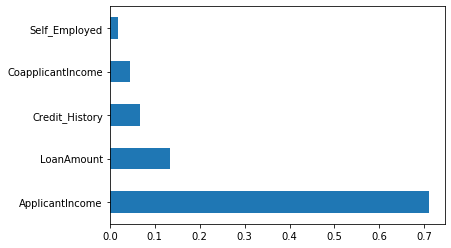

decision tree feature importances


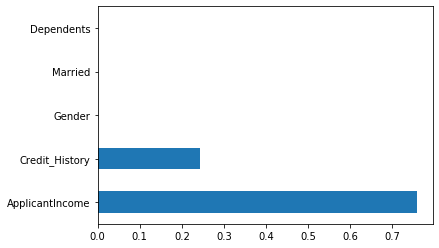

In [641]:
print("random forest feature importances")
(pd.Series(model.feature_importances_, index=fn)
   .nlargest(5)
   .plot(kind='barh'))
plt.show()
print("decision tree feature importances")
(pd.Series(classifier.feature_importances_, index=fn)
   .nlargest(5)
   .plot(kind='barh'))
plt.show()

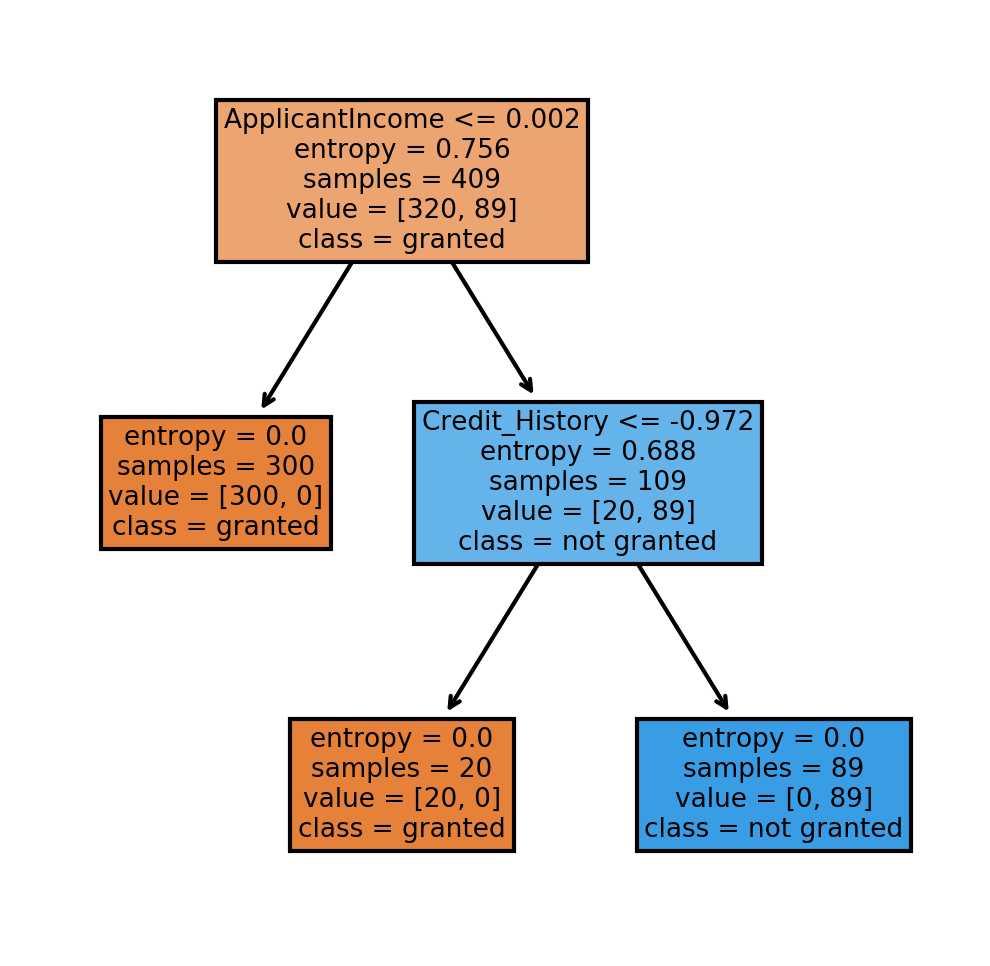

In [643]:
# Extract single tree
estimator = model.estimators_[0]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(classifier,
               feature_names=fn,
               class_names=cn,
               filled=True);
fig.savefig('C://Users//p70066360//Desktop//acustic_tree.png')



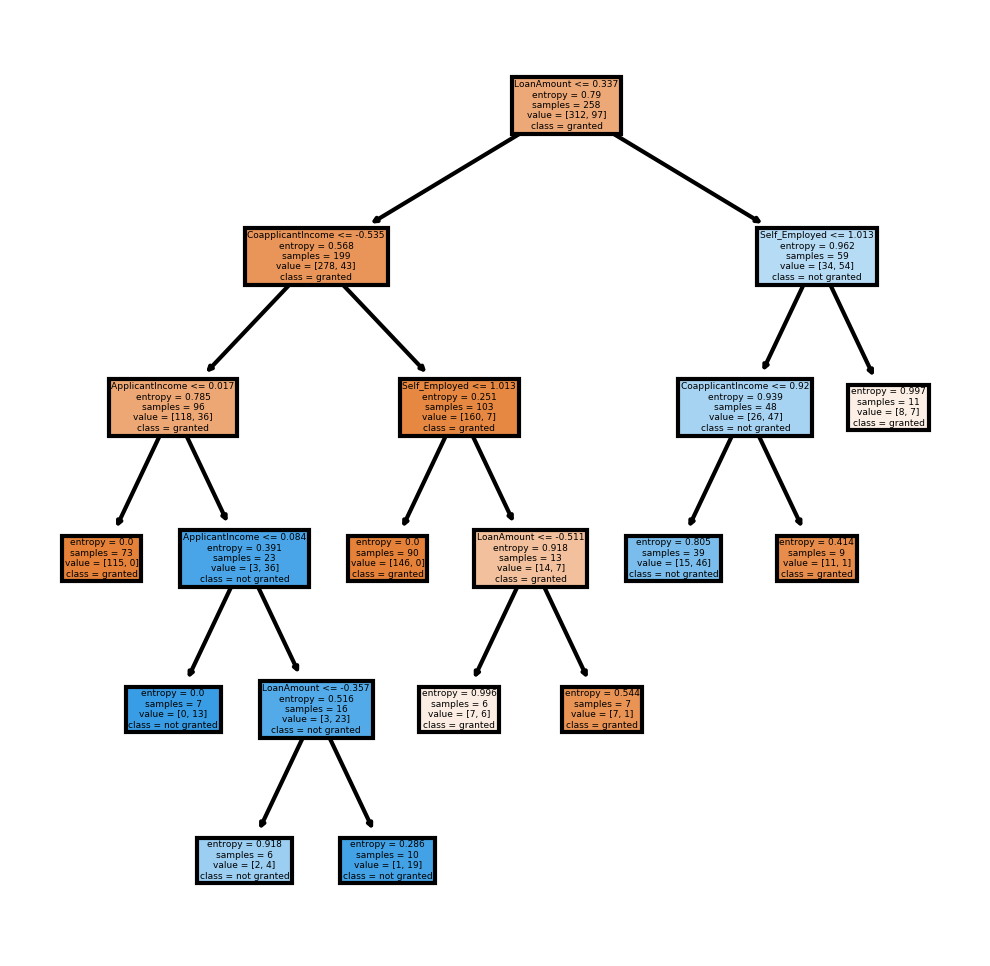

In [634]:

# Extract single tree
estimator = model.estimators_[1]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(estimator,
               feature_names=fn,
               class_names=cn,
               filled=True);
#fig.savefig('C://Users//p70066360//Desktop//acustic_tree.png')

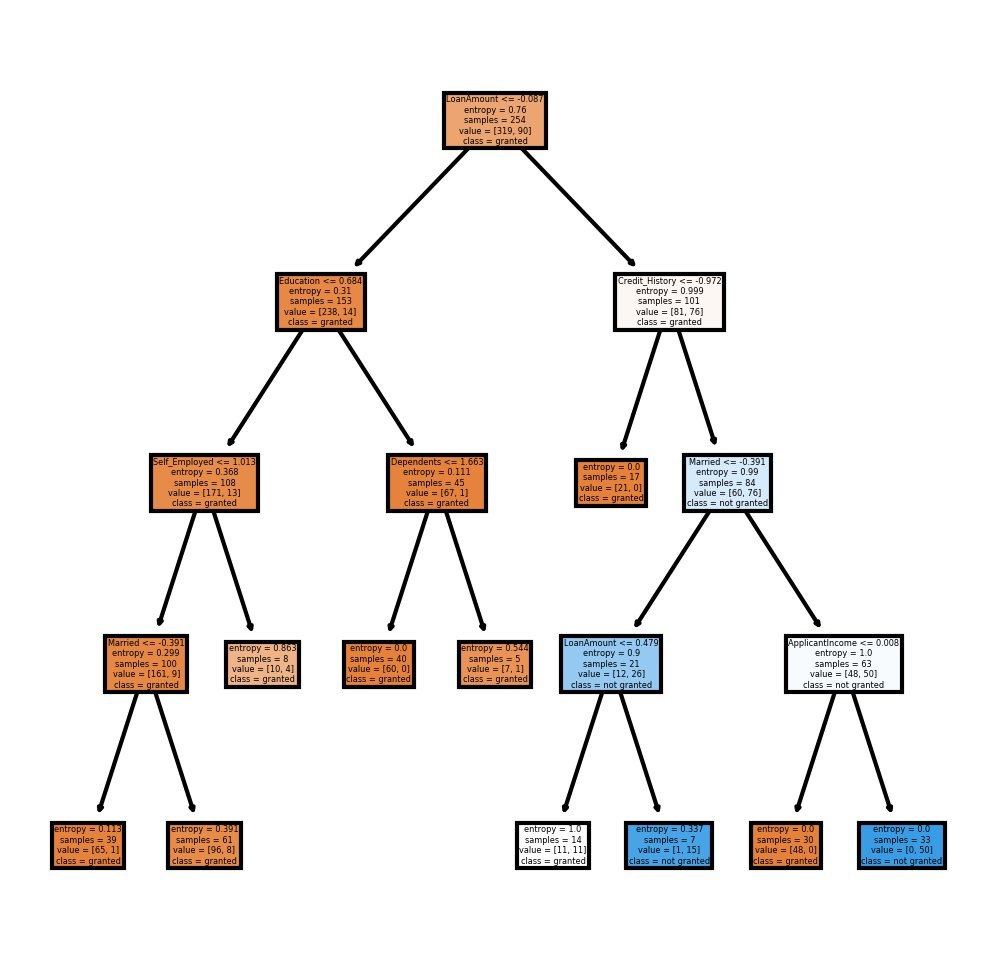

In [635]:

# Extract single tree
estimator = model.estimators_[2]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(estimator,
               feature_names=fn,
               class_names=cn,
               filled=True);
fig.savefig('C://Users//p70066360//Desktop//acustic_tree.png')

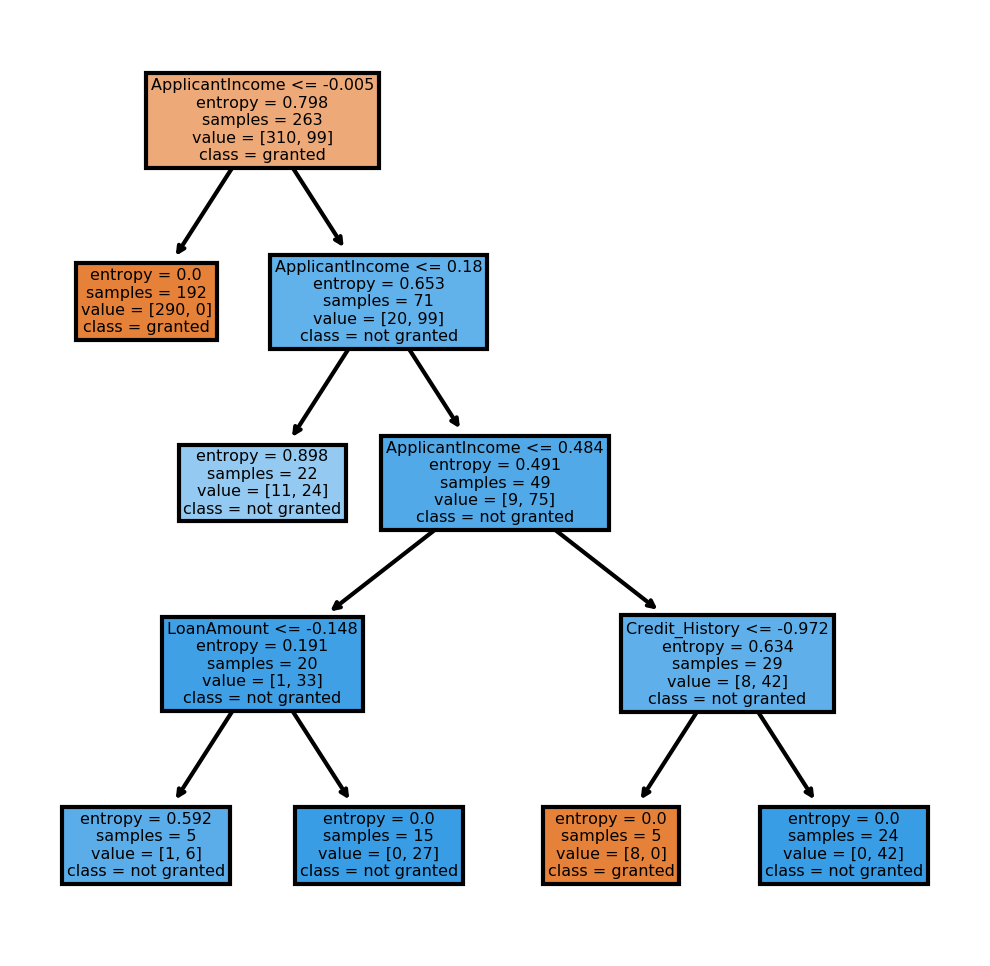

In [636]:

# Extract single tree
estimator = model.estimators_[3]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(estimator,
               feature_names=fn,
               class_names=cn,
               filled=True);
#fig.savefig('C://Users//p70066360//Desktop//acustic_tree.png')

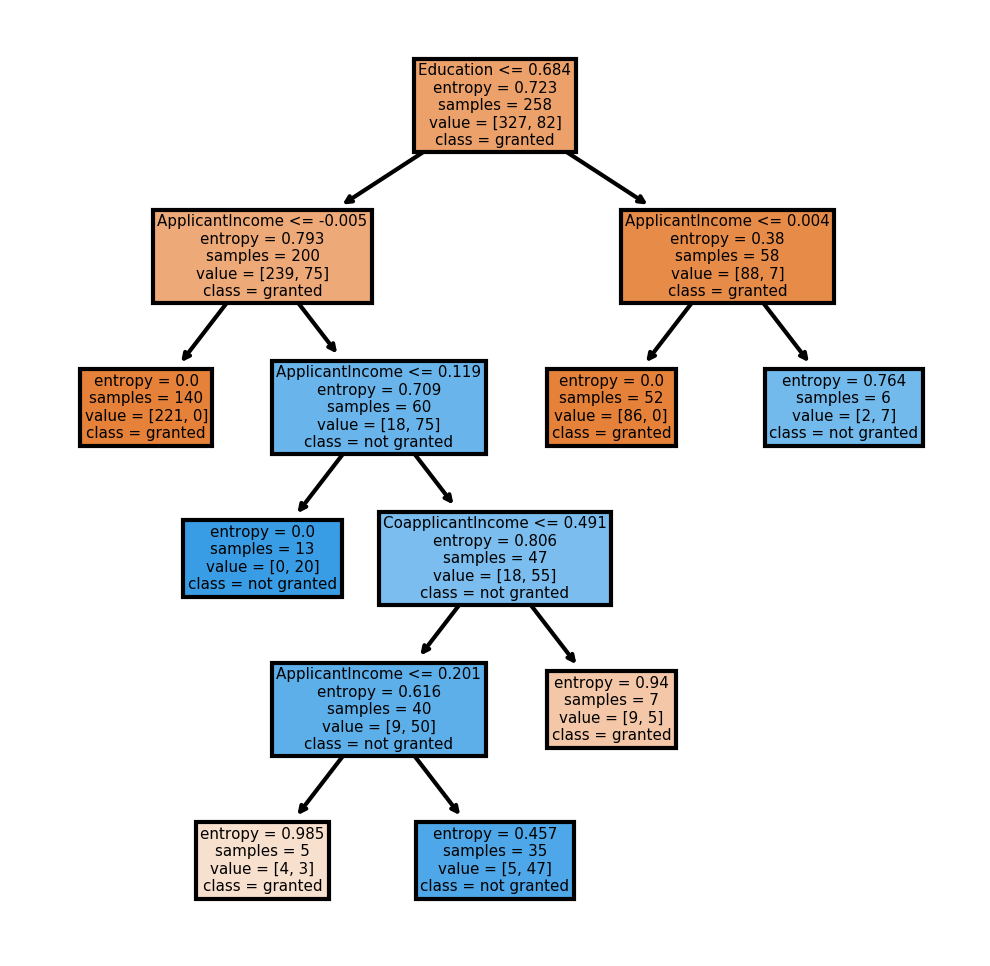

In [637]:

# Extract single tree
estimator = model.estimators_[4]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(estimator,
               feature_names=fn,
               class_names=cn,
               filled=True);
fig.savefig('C://Users//p70066360//Desktop//acustic_tree.png')

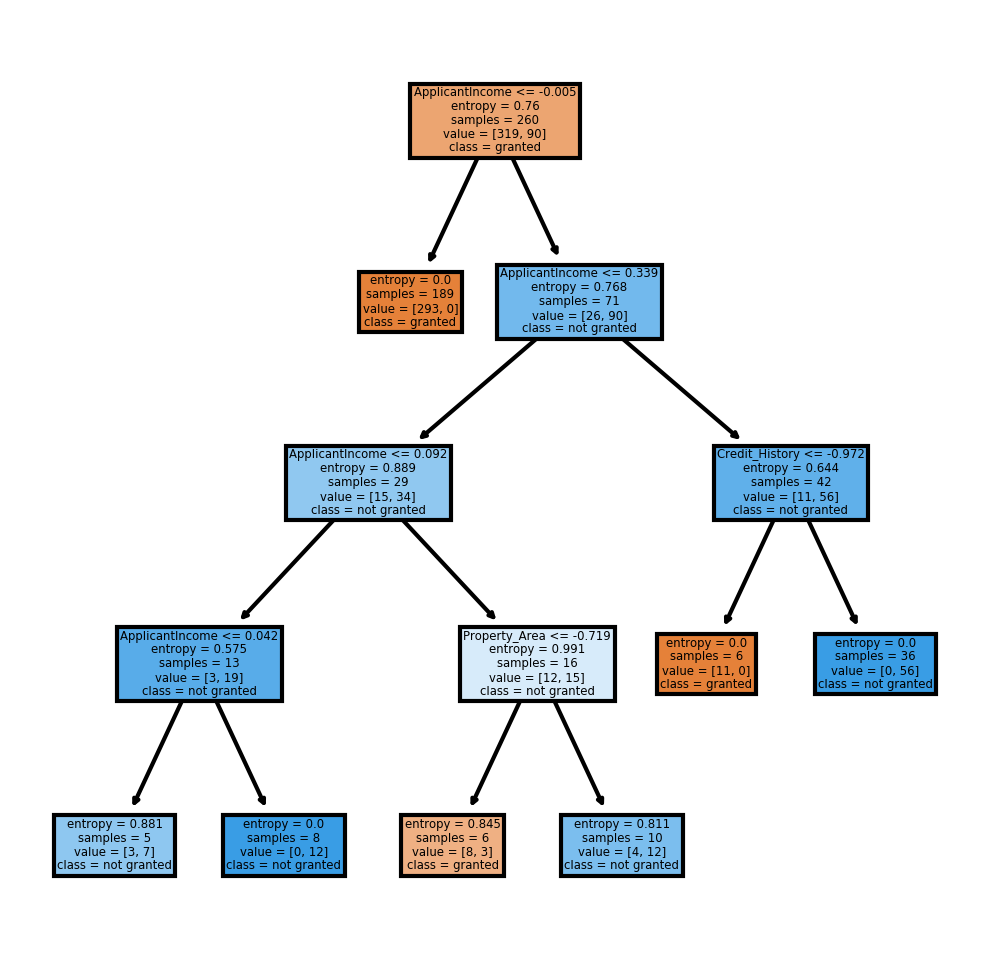

In [638]:

# Extract single tree
estimator = model.estimators_[5]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(estimator,
               feature_names=fn,
               class_names=cn,
               filled=True);
#fig.savefig('C://Users//p70066360//Desktop//acustic_tree.png')